In [16]:
!pip install ta

In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import warnings
import datetime
import matplotlib.ticker as ticker
import ta

In [15]:
df_price = pd.read_csv('HLB_price(20.1~24.7).csv',index_col='Date')
df_price = df_price.loc['2020-07-01':'2024-07-01']
df_price

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2020-07-01,41174,41669,39244,39561,2979458,-0.140483
2020-07-02,39740,41671,39650,41313,1636436,-0.079991
2020-07-03,41713,41802,40726,40998,805330,-0.082408
2020-07-06,40996,41130,40277,40504,689209,-0.070113
2020-07-07,40549,40818,39651,39921,1219263,-0.039945
...,...,...,...,...,...,...
2024-06-25,66100,73800,65900,72800,6153731,0.159236
2024-06-26,72000,72700,60800,65000,6976235,0.025237
2024-06-27,63200,65600,63100,63900,1696469,0.006299


# Bollenger band

In [13]:
bol_h = ta.volatility.bollinger_hband(df['Close'])
bol_l = ta.volatility.bollinger_lband(df['Close'])

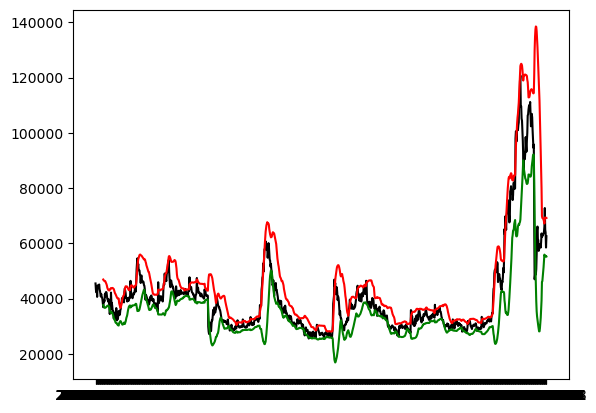

In [20]:
plt.plot(df['Close'],c='k')
plt.plot(bol_h,c='r')
plt.plot(bol_l,c='g')
plt.show()

In [46]:
bol_h.dropna(inplace=True)
bol_l.dropna(inplace=True)

In [56]:
data_bollenger_h = bol_h.loc['2020-07-01':'2024-07-01'] # 볼린저밴드 상단선
data_bollenger_l = bol_l.loc['2020-07-01':'2024-07-01'] # 볼린저밴드 하단선

In [63]:
data_bollenger_h.to_csv('data_bollenger_h.csv')
data_bollenger_l.to_csv('data_bollenger_l.csv')

# RSI

In [18]:
rsi = ta.momentum.rsi(df_price['Close'])
rsi

Date
2020-07-01          NaN
2020-07-02          NaN
2020-07-03          NaN
2020-07-06          NaN
2020-07-07          NaN
                ...    
2024-06-25    58.267868
2024-06-26    47.064596
2024-06-27    45.729254
2024-06-28    39.764654
2024-07-01    45.569664
Name: rsi, Length: 986, dtype: float64

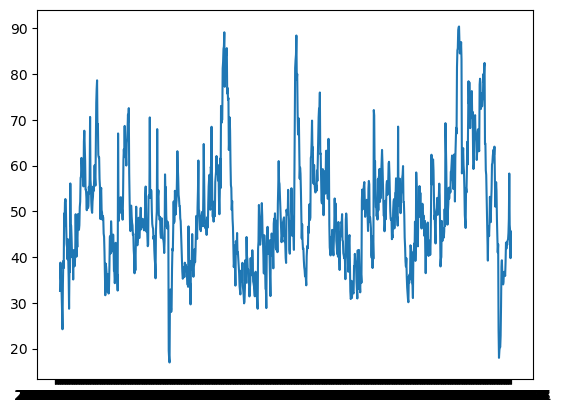

In [39]:
plt.plot(rsi)
plt.show()

In [57]:
rsi.dropna(inplace=True)
rsi

Date
2020-01-21    32.598740
2020-01-22    38.788897
2020-01-23    35.562544
2020-01-28    34.041388
2020-01-29    31.770782
                ...    
2024-06-25    58.267868
2024-06-26    47.064596
2024-06-27    45.729254
2024-06-28    39.764654
2024-07-01    45.569664
Name: rsi, Length: 1096, dtype: float64

In [16]:
data_rsi = rsi.loc['2020-07-01':'2024-07-01'] # rsi

NameError: name 'rsi' is not defined

In [64]:
data_rsi.to_csv('data_rsi.csv')

In [11]:
df = pd.read_csv('ema, macd, signal 20.1~24.7.csv',index_col='Date')
df

,EMA5,EMA20,MACD,Signal
Date,,,,
2020-01-02,45495.000000,45495.000000,0.000000,0.000000
2020-01-03,44725.666667,45275.190476,-184.113960,-36.822792
2020-01-06,43920.777778,44992.886621,-396.144966,-108.687227
2020-01-07,43795.185185,44854.897419,-459.392678,-178.828317
2020-01-08,42743.123457,44453.383379,-735.448376,-290.152329
...,...,...,...,...
2024-06-25,67103.712455,65416.022190,-2394.744685,-4820.771602
2024-06-26,66402.474970,65376.401029,-2191.951586,-4295.007598
2024-06-27,65568.316647,65235.791407,-2095.837886,-3855.173656


In [12]:
df = df.loc['2020-07-01':'2024-07-01']
df

,EMA5,EMA20,MACD,Signal
Date,,,,
2020-07-01,42361.491723,45232.475583,-843.717950,233.211683
2020-07-02,42011.994482,44859.192194,-1030.875834,-19.605821
2020-07-03,41673.996321,44491.459604,-1190.889836,-253.862624
2020-07-06,41283.997548,44111.701546,-1342.092945,-471.508688
2020-07-07,40829.665032,43712.587113,-1491.769535,-675.560857
...,...,...,...,...
2024-06-25,67103.712455,65416.022190,-2394.744685,-4820.771602
2024-06-26,66402.474970,65376.401029,-2191.951586,-4295.007598
2024-06-27,65568.316647,65235.791407,-2095.837886,-3855.173656


In [22]:
df_rsi = pd.read_csv('data_rsi.csv',index_col='Date')
df_bollenger_h = pd.read_csv('data_bollenger_h.csv',index_col="Date")
df_bollenger_l = pd.read_csv('data_bollenger_l.csv',index_col='Date')

In [25]:
df['RSI'] = df_rsi['rsi']
df

C:\Users\atg72\AppData\Local\Temp\ipykernel_16380\3448443424.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = df_rsi['rsi']


,EMA5,EMA20,MACD,Signal,RSI
Date,,,,,
2020-07-01,42361.491723,45232.475583,-843.717950,233.211683,31.655961
2020-07-02,42011.994482,44859.192194,-1030.875834,-19.605821,38.571056
2020-07-03,41673.996321,44491.459604,-1190.889836,-253.862624,37.829926
2020-07-06,41283.997548,44111.701546,-1342.092945,-471.508688,36.640878
2020-07-07,40829.665032,43712.587113,-1491.769535,-675.560857,35.233389
...,...,...,...,...,...
2024-06-25,67103.712455,65416.022190,-2394.744685,-4820.771602,58.267868
2024-06-26,66402.474970,65376.401029,-2191.951586,-4295.007598,47.064596
2024-06-27,65568.316647,65235.791407,-2095.837886,-3855.173656,45.729254


In [26]:
df['Bollenger_high'] = df_bollenger_h['hband']
df['Bollenger_low'] = df_bollenger_l['lband']
df

C:\Users\atg72\AppData\Local\Temp\ipykernel_16380\2024184070.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bollenger_high'] = df_bollenger_h['hband']
C:\Users\atg72\AppData\Local\Temp\ipykernel_16380\2024184070.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Bollenger_low'] = df_bollenger_l['lband']


,EMA5,EMA20,MACD,Signal,RSI,Bollenger_high,Bollenger_low
Date,,,,,,,
2020-07-01,42361.491723,45232.475583,-843.717950,233.211683,31.655961,53316.944700,40615.455300
2020-07-02,42011.994482,44859.192194,-1030.875834,-19.605821,38.571056,52903.468876,40009.631124
2020-07-03,41673.996321,44491.459604,-1190.889836,-253.862624,37.829926,52107.456598,39651.443402
2020-07-06,41283.997548,44111.701546,-1342.092945,-471.508688,36.640878,51672.963069,39097.936931
2020-07-07,40829.665032,43712.587113,-1491.769535,-675.560857,35.233389,51180.323509,38562.276491
...,...,...,...,...,...,...,...
2024-06-25,67103.712455,65416.022190,-2394.744685,-4820.771602,58.267868,69356.435869,55443.564131
2024-06-26,66402.474970,65376.401029,-2191.951586,-4295.007598,47.064596,69392.470889,55437.529111
2024-06-27,65568.316647,65235.791407,-2095.837886,-3855.173656,45.729254,69113.957336,55496.042664


In [28]:
data = pd.concat([df_price,df],axis=1)
data

,Open,High,Low,Close,Volume,Change,EMA5,EMA20,MACD,Signal,RSI,Bollenger_high,Bollenger_low
Date,,,,,,,,,,,,,
2020-07-01,41174,41669,39244,39561,2979458,-0.140483,42361.491723,45232.475583,-843.717950,233.211683,31.655961,53316.944700,40615.455300
2020-07-02,39740,41671,39650,41313,1636436,-0.079991,42011.994482,44859.192194,-1030.875834,-19.605821,38.571056,52903.468876,40009.631124
2020-07-03,41713,41802,40726,40998,805330,-0.082408,41673.996321,44491.459604,-1190.889836,-253.862624,37.829926,52107.456598,39651.443402
2020-07-06,40996,41130,40277,40504,689209,-0.070113,41283.997548,44111.701546,-1342.092945,-471.508688,36.640878,51672.963069,39097.936931
2020-07-07,40549,40818,39651,39921,1219263,-0.039945,40829.665032,43712.587113,-1491.769535,-675.560857,35.233389,51180.323509,38562.276491
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,66100,73800,65900,72800,6153731,0.159236,67103.712455,65416.022190,-2394.744685,-4820.771602,58.267868,69356.435869,55443.564131
2024-06-26,72000,72700,60800,65000,6976235,0.025237,66402.474970,65376.401029,-2191.951586,-4295.007598,47.064596,69392.470889,55437.529111
2024-06-27,63200,65600,63100,63900,1696469,0.006299,65568.316647,65235.791407,-2095.837886,-3855.173656,45.729254,69113.957336,55496.042664


In [29]:
data.to_csv('HLB_invest_data.csv')

In [35]:
data.loc[['2023-12-18','2023-12-13']]

,Open,High,Low,Close,Volume,Change,EMA5,EMA20,MACD,Signal,RSI,Bollenger_high,Bollenger_low
Date,,,,,,,,,,,,,
2023-12-18,43450,45300,41950,44000,3627689,0.292217,40418.888025,35214.901873,2576.844767,1381.485329,85.664449,41665.024332,26509.975668
2023-12-13,34800,35050,34350,34700,694622,0.057927,34026.247086,32564.427212,922.921851,686.187039,66.990549,34622.253276,30062.746724


In [39]:
df_comment = pd.read_csv('hlb_board_data_with_interest_metrics.csv',index_col='date')
df_comment = df_comment.loc['2020-09-01':'2024-07-01']
df_comment

,post_count,views_sum,net_recommends_sum,views_avg,net_recommends_avg,views_log_growth_5,net_recommends_log_growth_5,post_count_log_growth_5,views_log_growth_10,net_recommends_log_growth_10,post_count_log_growth_10,views_log_growth_20,net_recommends_log_growth_20,post_count_log_growth_20
date,,,,,,,,,,,,,,
2020-09-01,685,137502.0,1562.0,137502.0,1598.0,0.479788,0.262552,0.326883,1.292044,0.966333,1.875458,-0.382325,-0.327853,-0.641470
2020-09-02,1777,341804.0,3208.0,341804.0,3244.0,1.552611,1.547871,1.357998,2.255005,1.927583,2.800551,-0.669813,-0.414874,-0.727714
2020-09-03,767,170554.0,2224.0,170554.0,2260.0,1.742331,1.921002,2.088610,0.279961,0.792625,0.312766,-0.956987,-0.304356,-1.109848
2020-09-04,606,142396.0,1820.0,142396.0,1856.0,1.434607,1.040018,1.734051,0.562608,0.914138,0.260551,0.024599,0.501530,0.566238
2020-09-05,138,63541.0,823.0,63541.0,859.0,-0.703940,-0.372727,-1.432320,-0.206446,0.117201,-1.377195,-0.288669,-0.004646,-0.330242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-27,674,99349.0,1616.0,99349.0,1652.0,1.205877,1.217379,2.182497,0.561553,0.965611,0.971967,-0.145475,-0.149818,-0.263277
2024-06-28,1547,138063.0,1771.0,138063.0,1807.0,1.441559,1.368197,2.625574,1.074270,1.495536,1.846905,0.941619,0.667470,1.734601
2024-06-29,316,53255.0,687.0,53255.0,723.0,-0.172746,-0.081000,0.304704,0.070798,0.550323,0.068767,-0.078535,-0.245303,-0.028083


In [40]:
data_1 = data.loc['2020-09-01':'2024-07-01']
data_1

,Open,High,Low,Close,Volume,Change,EMA5,EMA20,MACD,Signal,RSI,Bollenger_high,Bollenger_low
Date,,,,,,,,,,,,,
2020-09-01,40861,42075,40143,40549,2304816,-0.007684,39891.052720,39590.421169,70.433497,-91.796016,52.590273,43583.738400,34729.961600
2020-09-02,41536,49888,40996,44366,18313866,0.113856,41382.701814,40045.238200,436.288500,13.820888,61.229139,44378.129467,34672.170533
2020-09-03,45308,45936,43601,45624,2996940,0.155887,42796.467876,40576.548848,818.308363,174.718383,63.584302,45382.952711,34394.947289
2020-09-04,44095,45577,44051,45085,2137674,0.134471,43559.311917,41005.925148,1065.289072,352.832521,61.850686,46107.625308,34370.874692
2020-09-07,45127,53885,45127,49081,12393920,0.259197,45399.874611,41774.979896,1565.421661,595.350349,68.670570,47686.280557,33959.719443
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,66100,73800,65900,72800,6153731,0.159236,67103.712455,65416.022190,-2394.744685,-4820.771602,58.267868,69356.435869,55443.564131
2024-06-26,72000,72700,60800,65000,6976235,0.025237,66402.474970,65376.401029,-2191.951586,-4295.007598,47.064596,69392.470889,55437.529111
2024-06-27,63200,65600,63100,63900,1696469,0.006299,65568.316647,65235.791407,-2095.837886,-3855.173656,45.729254,69113.957336,55496.042664


In [45]:
data_2 = pd.read_csv('output.csv',index_col='date')
data_2

,post_count,views_sum,net_recommends_sum,views_avg,net_recommends_avg,views_log_growth_5,net_recommends_log_growth_5,post_count_log_growth_5,views_log_growth_10,net_recommends_log_growth_10,post_count_log_growth_10,views_log_growth_20,net_recommends_log_growth_20,post_count_log_growth_20
date,,,,,,,,,,,,,,
2020-07-29,333,64611.0,625.0,64611.0,661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-30,1115,196291.0,2069.0,196291.0,2105.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-31,765,136578.0,1247.0,136578.0,1283.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-03,663,119055.0,1464.0,119055.0,1500.0,0.611201,0.819467,0.688633,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-04,537,88052.0,586.0,88052.0,622.0,-0.801671,-1.219131,-0.730612,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-08,1115,215589.0,2601.0,215589.0,2637.0,-0.601438,-0.600223,-0.984410,0.445664,0.377974,-0.327463,1.519934,1.873510,1.519441
2024-07-09,1229,233013.0,3959.0,233013.0,3995.0,-0.132368,0.210088,-0.384360,1.476003,1.709390,1.358214,1.546801,2.259713,1.426981
2024-07-10,787,174834.0,2139.0,174834.0,2175.0,-0.500706,-0.765414,-0.881381,1.262855,1.444508,1.044211,1.534442,1.595739,1.166970


In [46]:
data_2 = data_2.loc['2020-09-01':'2024-07-01']
data_2

,post_count,views_sum,net_recommends_sum,views_avg,net_recommends_avg,views_log_growth_5,net_recommends_log_growth_5,post_count_log_growth_5,views_log_growth_10,net_recommends_log_growth_10,post_count_log_growth_10,views_log_growth_20,net_recommends_log_growth_20,post_count_log_growth_20
date,,,,,,,,,,,,,,
2020-09-01,685,137502.0,1562.0,137502.0,1598.0,0.479788,0.262552,0.326883,1.292044,0.966333,1.875458,-0.382325,-0.327853,-0.641470
2020-09-02,1777,341804.0,3208.0,341804.0,3244.0,1.552611,1.547871,1.357998,2.255005,1.927583,2.800551,-0.669813,-0.414874,-0.727714
2020-09-03,767,170554.0,2224.0,170554.0,2260.0,1.742331,1.921002,2.088610,0.279961,0.792625,0.312766,-0.956987,-0.304356,-1.109848
2020-09-04,606,142396.0,1820.0,142396.0,1856.0,1.434607,1.040018,1.734051,0.562608,0.914138,0.260551,0.024599,0.501530,0.566238
2020-09-07,2083,423958.0,4331.0,423958.0,4367.0,0.215397,0.297269,0.158883,1.768008,1.845140,1.516881,0.761175,1.085418,0.711070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-25,935,158142.0,2193.0,158142.0,2229.0,1.434099,1.620263,1.339288,1.462598,1.922411,1.898904,0.456545,0.313587,0.455352
2024-06-26,2356,248242.0,4537.0,248242.0,4573.0,1.619568,1.806519,2.140703,1.812905,2.890590,2.605665,1.389660,1.522171,2.284082
2024-06-27,674,99349.0,1616.0,99349.0,1652.0,1.205877,1.217379,2.182497,0.561553,0.965611,0.971967,-0.145475,-0.149818,-0.263277
